In [39]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('cs_bisnode_panel.csv')

In [41]:
#Drop das colunas
df = df.drop(columns=['COGS', 'finished_prod', 'net_dom_sales',
'net_exp_sales', 'wages', 'D'])

#Remove registros de 2016
df = df[df['year']!=2016]

#Cria uma coluna para verificar se a empresa esta ativa em 2012
df['Open_2012'] = df.groupby('comp_id')['year'].transform(lambda x: 2012 in x.values)

## Separação das colunas

In [42]:
col_and = ['comp_id','amort','curr_assets','curr_liab','extra_exp','extra_inc','extra_profit_loss','balsheet_length', 'nace_main', 'urban_m', 'exit_date','year', 'Open_2012']

df_and = df[col_and]

df_and.head()

,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,balsheet_length,nace_main,urban_m,exit_date,year,Open_2012
0,1001034.0,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,364,5630.0,1,NaN,2005,True
1,1001034.0,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,364,5630.0,1,NaN,2006,True
2,1001034.0,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,364,5630.0,1,NaN,2007,True
3,1001034.0,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,365,5630.0,1,NaN,2008,True
4,1001034.0,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,364,5630.0,1,NaN,2009,True


Primeiro é necessário observar se há valores negativos para algumas variáveis, pois há casos em que esses valores negativos não fazem sentido. Nesses casos, o valor será atribuído como zero.

As colunas em que valores negativos não fazem sentido são:

- amort
- extra_exp
- extra_inc
- extra_profit_loss

Então é feita essa manipulação


In [43]:
col_neg = ["amort", "extra_exp", "extra_inc", "extra_profit_loss"]

for col in col_neg:

    array_neg = np.where(df_and[col] < 0, 0, df_and[col])
    df_and[col] = array_neg

C:\Users\andre\AppData\Local\Temp\ipykernel_4208\2638713761.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_and[col] = array_neg


## Verificação de variáveis assimétricas

Para isso, é necessário retirar algumas colunas, que representam variáveis categóricas ou datas, para assim plotar os histogramas e verificar se há assimetria

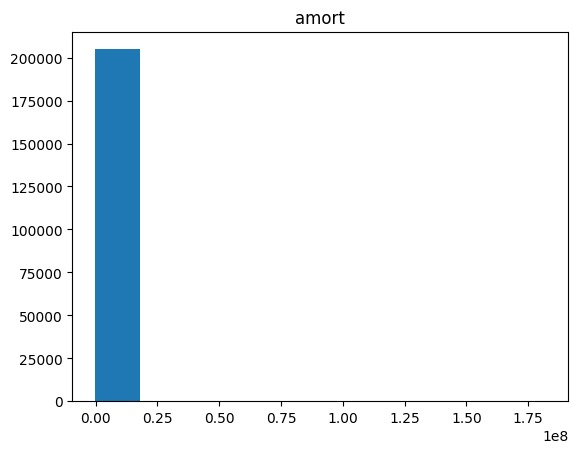

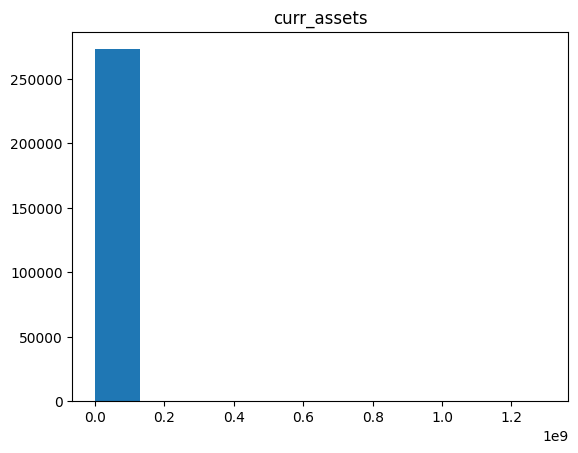

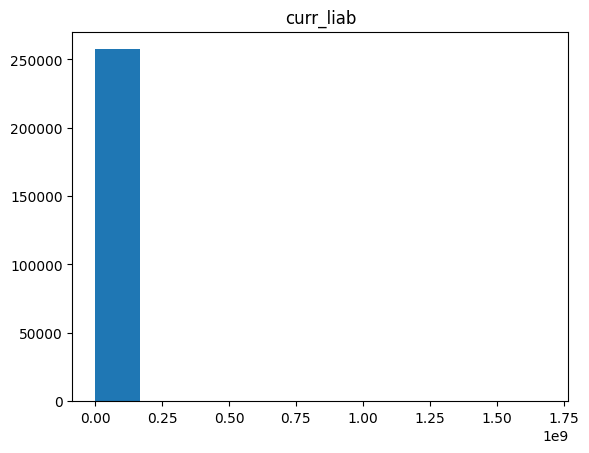

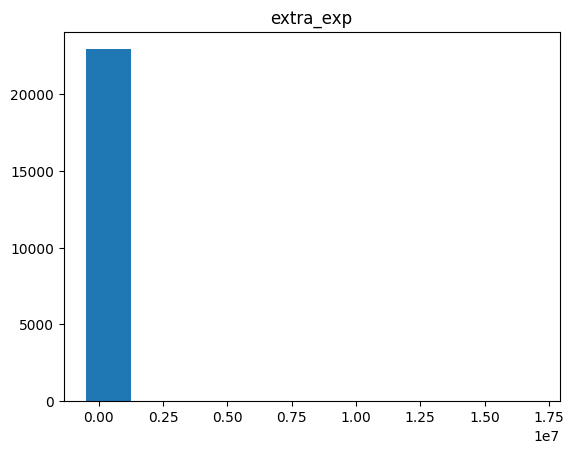

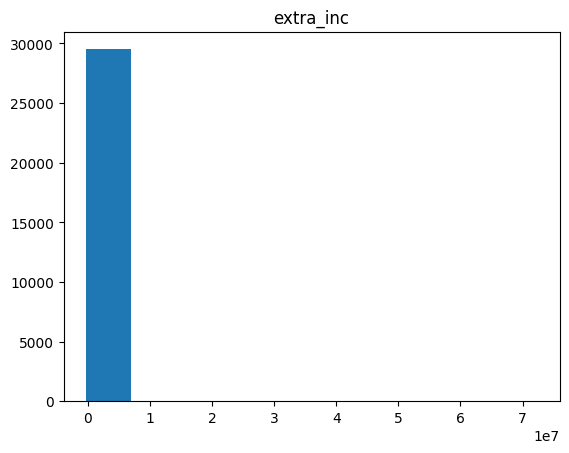

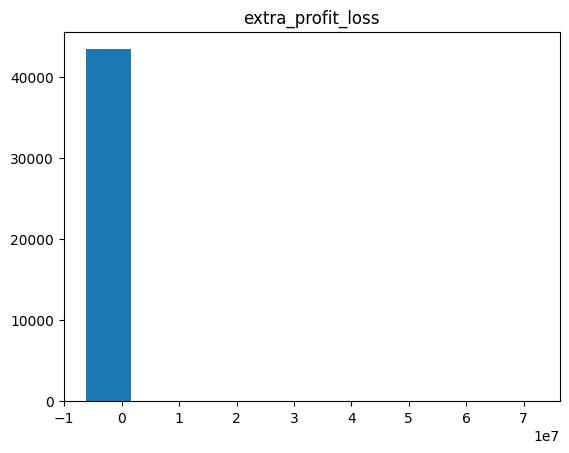

In [44]:
# Retirada de variáveis categóricas e datas
col_as = list(df_and.drop(["comp_id", "year","exit_date","Open_2012","balsheet_length","nace_main","urban_m"], axis=1).columns)

for col in col_as:

    plt.figure()
    plt.hist(df[[col]].replace(0, np.nan))
    plt.title(f'{col}')

plt.show()

É visto que todas as variáveis são assimétricas, então se converte os valores em log para observar se os histogramas ficam mais apropriados.

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value en

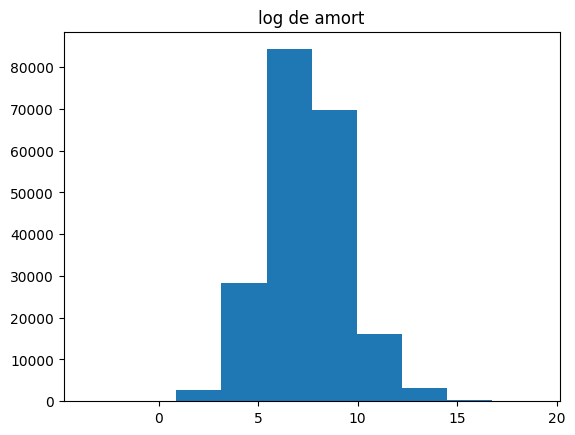

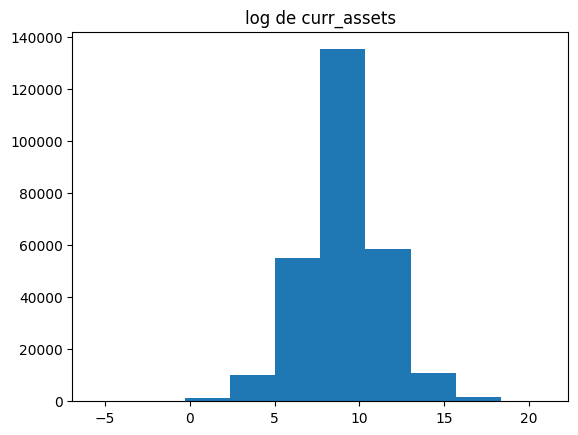

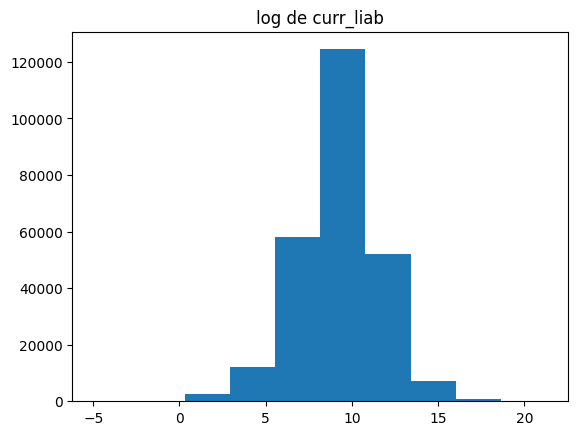

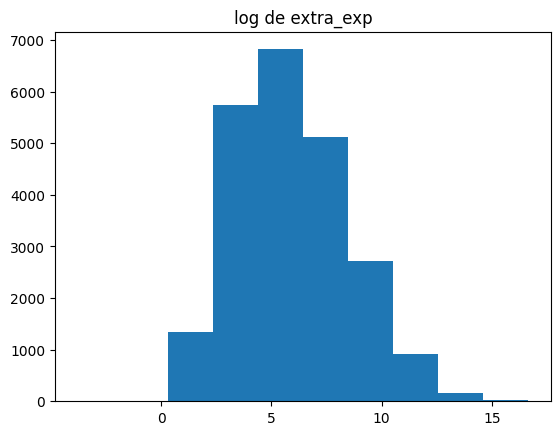

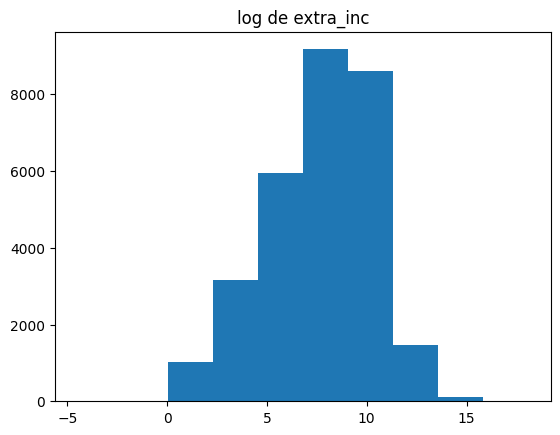

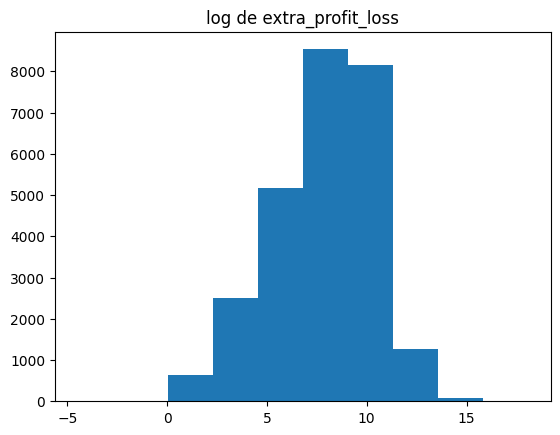

In [45]:
for col in col_as:
    plt.figure()
    plt.hist(np.log(df[[col]].replace(0, np.nan)))
    plt.title(f'log de {col}')

plt.show()

Visto que os valores apresentam melhor simetria em log, é criado essas colunas com valores em log:

In [46]:
for col in col_as:
    name = 'log_'+col
    df_and[name] = np.log(df[[col]].replace(0, np.nan))

df_and

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\andre\AppData\Local\Temp\ipykernel_4208\3169935574.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_and[name] = np.log(df[[col]].replace(0, np.nan))
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pandas\core\internals\blocks.py:329: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)
C:\Users\andre\AppData\Local\Temp\ipykernel_4208\3169935574.py:3

,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,balsheet_length,nace_main,urban_m,exit_date,year,Open_2012,log_amort,log_curr_assets,log_curr_liab,log_extra_exp,log_extra_inc,log_extra_profit_loss
0,1.001034e+06,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,364,5630.0,1,NaN,2005,True,6.540442,8.891053,8.932486,NaN,NaN,NaN
1,1.001034e+06,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,364,5630.0,1,NaN,2006,True,6.403083,9.482062,9.410102,NaN,NaN,NaN
2,1.001034e+06,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,364,5630.0,1,NaN,2007,True,6.054265,9.011438,8.961879,NaN,NaN,NaN
3,1.001034e+06,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,365,5630.0,1,NaN,2008,True,5.703782,9.046077,8.959502,NaN,NaN,NaN
4,1.001034e+06,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,364,5630.0,1,NaN,2009,True,5.334685,8.544232,9.635608,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,4.641209e+11,0.000000,1807.407349,3.703704,0.0,0.0,0.0,364,5510.0,2,NaN,2011,True,NaN,7.499649,1.309333,NaN,NaN,NaN
287825,4.641209e+11,0.000000,1518.518555,96.296295,0.0,0.0,0.0,365,5510.0,2,NaN,2012,True,NaN,7.325491,4.567430,NaN,NaN,NaN
287826,4.641209e+11,0.000000,988.888916,77.777779,0.0,0.0,0.0,364,5510.0,2,NaN,2013,True,NaN,6.896582,4.353856,NaN,NaN,NaN
287827,4.641209e+11,0.000000,644.444458,233.333328,0.0,0.0,0.0,364,5510.0,2,NaN,2014,True,NaN,6.468389,5.452468,NaN,NaN,NaN


*curr_assets* -> Ativos Circulantes

*curr_liab* -> Passivos Circulantes

Com esses dois valores, é possível calcular o **capital circulante líquido**, dividindo os ativos circulantes por passivos circulantes. Esse valor significa o quanto a empresa consegue pagar suas contas e dívidas no prazo correto.

É interessante fazer mais uma coluna com esse cálculo pois pode ser um dos motivos aos quais a empresa fechou.

Ex: Caso uma empresa tenha o valor de liquidez corrente igual a 2, significa que a cada R$ 1,00 de dívida, ela tem R$ 2,00 para abater essa dívida.

Então, empresas com valores menores que 1, significa que elas não conseguem abater a dívida naquele ano.

In [47]:
df_and["curr_idx_liq"] = df_and["curr_assets"]/df_and["curr_liab"]

df_and.head()

C:\Users\andre\AppData\Local\Temp\ipykernel_4208\3216315363.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_and["curr_idx_liq"] = df_and["curr_assets"]/df_and["curr_liab"]


,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,balsheet_length,nace_main,urban_m,exit_date,year,Open_2012,log_amort,log_curr_assets,log_curr_liab,log_extra_exp,log_extra_inc,log_extra_profit_loss,curr_idx_liq
0,1001034.0,692.592590,7266.666504,7574.074219,0.0,0.0,0.0,364,5630.0,1,NaN,2005,True,6.540442,8.891053,8.932486,NaN,NaN,NaN,0.959413
1,1001034.0,603.703674,13122.222656,12211.111328,0.0,0.0,0.0,364,5630.0,1,NaN,2006,True,6.403083,9.482062,9.410102,NaN,NaN,NaN,1.074613
2,1001034.0,425.925934,8196.295898,7800.000000,0.0,0.0,0.0,364,5630.0,1,NaN,2007,True,6.054265,9.011438,8.961879,NaN,NaN,NaN,1.050807
3,1001034.0,300.000000,8485.185547,7781.481445,0.0,0.0,0.0,365,5630.0,1,NaN,2008,True,5.703782,9.046077,8.959502,NaN,NaN,NaN,1.090433
4,1001034.0,207.407410,5137.037109,15300.000000,0.0,0.0,0.0,364,5630.0,1,NaN,2009,True,5.334685,8.544232,9.635608,NaN,NaN,NaN,0.335754



Como assets e liabilities estão agrupados no capital circulante líquido, talvez não seja necessária essas duas colunas.

In [48]:
df_and = df_and.drop(["curr_liab", "curr_assets", "log_curr_liab", "log_curr_assets"], axis=1)

df_and

,comp_id,amort,extra_exp,extra_inc,extra_profit_loss,balsheet_length,nace_main,urban_m,exit_date,year,Open_2012,log_amort,log_extra_exp,log_extra_inc,log_extra_profit_loss,curr_idx_liq
0,1.001034e+06,692.592590,0.0,0.0,0.0,364,5630.0,1,NaN,2005,True,6.540442,NaN,NaN,NaN,0.959413
1,1.001034e+06,603.703674,0.0,0.0,0.0,364,5630.0,1,NaN,2006,True,6.403083,NaN,NaN,NaN,1.074613
2,1.001034e+06,425.925934,0.0,0.0,0.0,364,5630.0,1,NaN,2007,True,6.054265,NaN,NaN,NaN,1.050807
3,1.001034e+06,300.000000,0.0,0.0,0.0,365,5630.0,1,NaN,2008,True,5.703782,NaN,NaN,NaN,1.090433
4,1.001034e+06,207.407410,0.0,0.0,0.0,364,5630.0,1,NaN,2009,True,5.334685,NaN,NaN,NaN,0.335754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287824,4.641209e+11,0.000000,0.0,0.0,0.0,364,5510.0,2,NaN,2011,True,NaN,NaN,NaN,NaN,487.999992
287825,4.641209e+11,0.000000,0.0,0.0,0.0,365,5510.0,2,NaN,2012,True,NaN,NaN,NaN,NaN,15.769231
287826,4.641209e+11,0.000000,0.0,0.0,0.0,364,5510.0,2,NaN,2013,True,NaN,NaN,NaN,NaN,12.714286
287827,4.641209e+11,0.000000,0.0,0.0,0.0,364,5510.0,2,NaN,2014,True,NaN,NaN,NaN,NaN,2.761905
